In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el dataset procesado que creamos en la Fase 1.4
df = pd.read_csv('../outputs/churn_processed.csv')

# Eliminamos columnas que son IDs o que ya transformamos
# 'Phone' es ID, 'Churn?' es texto (ya tenemos Churn_Numeric)
df_ml = df.drop(['Phone', 'Churn?'], axis=1)

print(f"Dataset listo con {df_ml.shape[1]} columnas predictivas.") 
display(df_ml.head()) 

y = df_ml['Churn_Numeric']
X = df_ml.drop('Churn_Numeric', axis=1)

Dataset listo con 21 columnas predictivas.


,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn_Numeric,Total_Combined_Charge
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [4]:
# Dividimos: 80% para entrenar, 20% para evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Pruebas (Examen): {X_test.shape[0]} registros")

Entrenamiento: 2666 registros
Pruebas (Examen): 667 registros


In [5]:
X_train.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Total_Combined_Charge
817,UT,243,510,no,no,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,43.82
1373,SC,108,415,no,no,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4,46.01
679,TX,75,415,yes,no,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,77.32
56,CO,141,415,no,no,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,45.37
1993,IN,86,510,no,no,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0,70.26


In [6]:
# 1. Identificamos qué columnas son texto
columnas_categoricas = X.select_dtypes(include=['object']).columns
print(f"Columnas a transformar: {list(columnas_categoricas)}")

# 2. Aplicamos One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 3. Volvemos a hacer el split con los datos ya transformados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Nuevas columnas después del encoding: {X_encoded.shape[1]}")
X_encoded.head()

Columnas a transformar: ['State', "Int'l Plan", 'VMail Plan']
Nuevas columnas después del encoding: 69


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_yes,VMail Plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


In [7]:
from sklearn.preprocessing import StandardScaler

# 1. Creamos el escalador
scaler = StandardScaler()

# 2. IMPORTANTE: El escalador solo "aprende" del set de entrenamiento (Train)
# para no conocer el futuro (Test).
X_train_scaled = scaler.fit_transform(X_train)

# 3. Luego aplicamos esa misma transformación al set de prueba
X_test_scaled = scaler.transform(X_test)

print("✅ Datos escalados y listos para la IA.")

✅ Datos escalados y listos para la IA.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Creamos el modelo
model = LogisticRegression()

# 2. ENTRENAMIENTO: Aquí es donde la magia ocurre
model.fit(X_train_scaled, y_train)

# 3. PREDICCIÓN: Vamos a ver qué tal le va en el examen (Test)
y_pred = model.predict(X_test_scaled)

# 4. RESULTADO INICIAL
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 El modelo tiene un Accuracy de: {accuracy:.2%}") 

🎯 El modelo tiene un Accuracy de: 85.76%


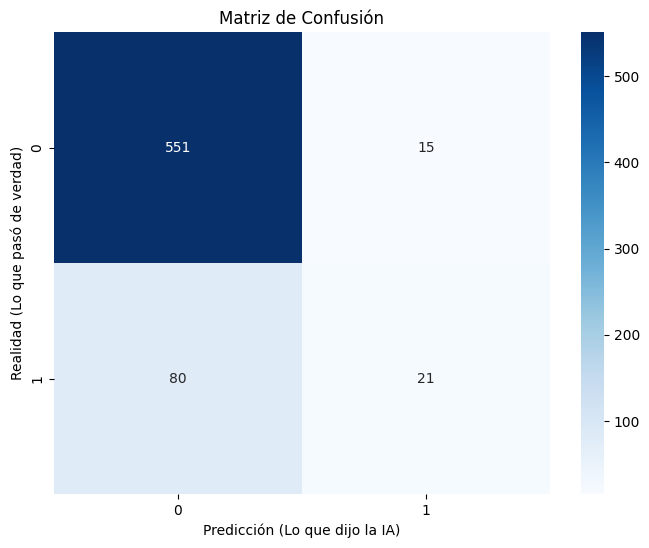

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 2. Visualizarla de forma bonita
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción (Lo que dijo la IA)')
plt.ylabel('Realidad (Lo que pasó de verdad)')
plt.title('Matriz de Confusión')
plt.show()

# 3. Ver el reporte detallado
print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 1. Creamos el modelo con el truco para clases desbalanceadas
# y 100 árboles de decisión (n_estimators)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 2. ENTRENAMIENTO (Usa los datos escalados que creamos antes)
rf_model.fit(X_train_scaled, y_train)

# 3. PREDICCIÓN (Hacemos el examen con los datos de prueba)
y_pred_rf = rf_model.predict(X_test_scaled) # ¿Qué variable va aquí?

print("✅ Modelo Random Forest entrenado.")

✅ Modelo Random Forest entrenado.


--- Reporte Random Forest ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       1.00      0.67      0.80       101

    accuracy                           0.95       667
   macro avg       0.97      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



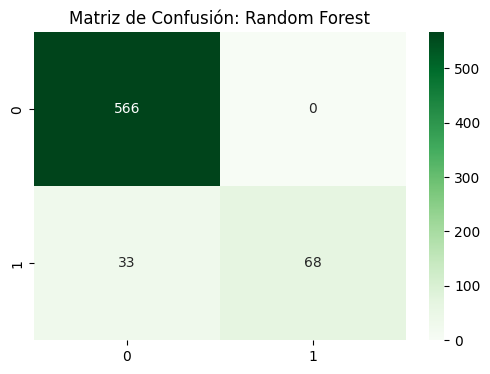

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Ver el nuevo reporte
print("--- Reporte Random Forest ---")
print(classification_report(y_test, y_pred_rf))

# Nueva Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión: Random Forest')
plt.show()

In [12]:
import joblib
import os

# Crear la carpeta si no existe
os.makedirs('../models', exist_ok=True)

# Guardar el modelo
joblib.dump(rf_model, '../models/churn_model_rf_v1.joblib')

# Guardar el escalador (¡Vital para MLOps!)
joblib.dump(scaler, '../models/scaler_v1.joblib')

print("✅ Modelo y Escalador guardados en la carpeta /models")

✅ Modelo y Escalador guardados en la carpeta /models


In [13]:
from sklearn.model_selection import cross_val_score

# Evaluamos el modelo 5 veces con diferentes cortes de los datos
# Usamos 'f1' como métrica porque es la más balanceada para Churn
scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')

print(f"Resultados de las 5 pruebas: {scores}")
print(f"F1-Score promedio: {scores.mean():.2%} (+/- {scores.std():.2%})")

Resultados de las 5 pruebas: [0.768      0.80314961 0.83969466 0.71186441 0.78740157]
F1-Score promedio: 78.20% (+/- 4.22%)
